In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score


In [2]:
# California housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)
linear_reg_pred = linear_reg.predict(X_test_scaled)
linear_reg_r2 = r2_score(y_test, linear_reg_pred)

In [5]:
# Ridge Regression with Grid Search
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(Ridge(), param_grid=ridge_params, cv=5, scoring='r2')
ridge_grid.fit(X_train_scaled, y_train)
best_ridge = ridge_grid.best_estimator_
ridge_pred = best_ridge.predict(X_test_scaled)
ridge_r2 = r2_score(y_test, ridge_pred)

In [6]:
# Lasso Regression with Grid Search
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
lasso_grid = GridSearchCV(Lasso(), param_grid=lasso_params, cv=5, scoring='r2')
lasso_grid.fit(X_train_scaled, y_train)
best_lasso = lasso_grid.best_estimator_
lasso_pred = best_lasso.predict(X_test_scaled)
lasso_r2 = r2_score(y_test, lasso_pred)

In [9]:
# Stochastic Gradient Descent with Grid Search
sgd_params = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
    'max_iter': [1000, 2000, 3000],
}

sgd_grid = GridSearchCV(SGDRegressor(), param_grid=sgd_params, cv=5, scoring='r2')
sgd_grid.fit(X_train_scaled, y_train)
best_sgd = sgd_grid.best_estimator_
sgd_pred = best_sgd.predict(X_test_scaled)
sgd_r2 = r2_score(y_test, sgd_pred)

# Print Stochastic Gradient Descent R-squared and best hyperparameters
print("\nStochastic Gradient Descent:")
print("Best R-squared:", sgd_r2)
print("Best Hyperparameters:", best_sgd)


Stochastic Gradient Descent:
Best R-squared: 0.5811020670202883
Best Hyperparameters: SGDRegressor(alpha=0.01, l1_ratio=0.3, penalty='elasticnet')


In [14]:
# Batch Gradient Descent
batch_sgd_params = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
    'max_iter': [1000, 2000, 3000,5000],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
}

batch_sgd_grid = GridSearchCV(SGDRegressor(learning_rate='constant', eta0=0.01), param_grid=batch_sgd_params, cv=5, scoring='r2')
batch_sgd_grid.fit(X_train_scaled, y_train)
best_batch_sgd = batch_sgd_grid.best_estimator_
batch_sgd_pred = best_batch_sgd.predict(X_test_scaled)
batch_sgd_r2 = r2_score(y_test, batch_sgd_pred)

# Print R-squared and best hyperparameters for Batch Gradient Descent
print("\nBatch Gradient Descent:")
print("Best R-squared:", batch_sgd_r2)
print("Best Hyperparameters:", best_batch_sgd)

C:\Users\nilay\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\nilay\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\nilay\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\nilay\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Co


Batch Gradient Descent:
Best R-squared: 0.5839622066177828
Best Hyperparameters: SGDRegressor(alpha=0.01, l1_ratio=0.9, penalty='elasticnet')


In [15]:
# R-squared scores and best hyperparameters
print("Linear Regression R-squared:", linear_reg_r2)

print("\nRidge Regression:")
print("Best R-squared:", ridge_r2)
print("Best Hyperparameters:", best_ridge)

print("\nLasso Regression:")
print("Best R-squared:", lasso_r2)
print("Best Hyperparameters:", best_lasso)

print("\nStochastic Gradient Descent R-squared:", sgd_r2)
print("Best Batch R-squared:", batch_sgd_r2)

Linear Regression R-squared: 0.575787706032451

Ridge Regression:
Best R-squared: 0.5757879873121601
Best Hyperparameters: Ridge(alpha=0.01)

Lasso Regression:
Best R-squared: 0.5768562568705682
Best Hyperparameters: Lasso(alpha=0.001)

Stochastic Gradient Descent R-squared: 0.5811020670202883
Best Batch R-squared: 0.5839622066177828


0.5839622066177828 değeri ile Batch Modeli ile yaptığım eğitme en yüksek çıktı. Ancak hala çok düşük.
Peformansı optimize etmek için Grid Search'i en iyi Hyperparameter değerini bulmak için kullandım. 
İlk başta dataızın güçlü ilişkisi olduğunu düşündüğüm parametreleri çıkarıp tekrar denersem:

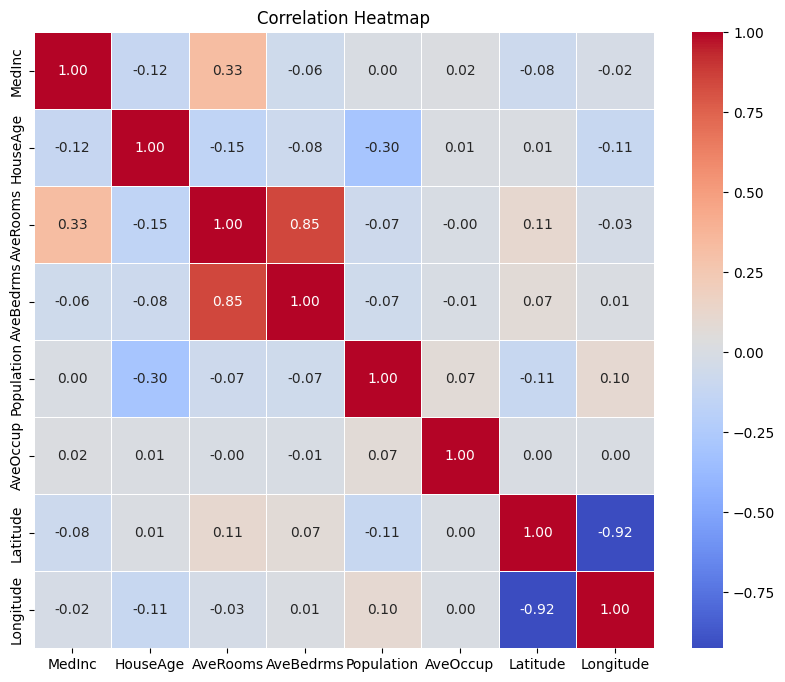

Best Lasso Regression R-squared: 0.5802286904344218
Best Lasso Regression Hyperparameters: Lasso(alpha=0.001)


In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Load California housing dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Create a correlation matrix
correlation_matrix = X.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Identify and drop a variable column with strong correlation
strong_corr_column = "AveRooms" 
X.drop(columns=[strong_corr_column], inplace=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lasso Regression with Grid Search
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
lasso_grid = GridSearchCV(Lasso(), param_grid=lasso_params, cv=5, scoring='r2')
lasso_grid.fit(X_train_scaled, y_train)
best_lasso = lasso_grid.best_estimator_
lasso_pred = best_lasso.predict(X_test_scaled)
lasso_r2 = r2_score(y_test, lasso_pred)

print("Best Lasso Regression R-squared:", lasso_r2)
print("Best Lasso Regression Hyperparameters:", best_lasso)


Bu da aslında fazla bir değişiklikte bulunmadı. Yani Stochastic Gradient Descent yöntemi ile,
Best R-squared: 0.5811020670202883 bulunabiliyor ve bunun için en verilebilecek en iyi değerler de: 
Best Hyperparameters: SGDRegressor(alpha=0.01, l1_ratio=0.3, penalty='elasticnet') şeklinde görülüyor. (en azından grid search ile böyle bulundu.)